In [2]:
import tensorflow as tf
import matplotlib as mlt
import matplotlib.pyplot as plt
import keras
import keras_vggface
from mtcnn.mtcnn  import MTCNN
import cv2
from PIL import Image
import numpy as np
import PIL
from matplotlib import pyplot
from numpy import asarray
from keras_vggface.vggface import VGGFace


In [ ]:
"""The complete example is on In[32], you can use the extract_face()
    function to run the prediction on 8573 celebrities.
   
    !!!Please Ensure the image is on your current working directory with the Mariano_rajo as the name of the file
    
    This Keras model can be used directly to predict the probability
    of a given face belonging to one or more of more than eight thousand
    knowncelebrities. To run the Model for celebrities out the  above number 8573, Replace 'resnet50'in line 20 with 'vgg16' or 'senet50' """
   

In [3]:
#Image Regnognition for Mariano rajo
""" Ensure the image is on your current working directory with the Mariano_rajo as the name of the file
"""
# load image from file
pixels = pyplot.imread('mariano_rajoy.jpg')

#pixels = plt.imread(mariano rajoy)

In [ ]:
dectector = MTCNN()
results = dectector.detect_faces(pixels)

In [5]:
results

[{'box': [204, 307, 641, 816],
  'confidence': 0.9999397993087769,
  'keypoints': {'left_eye': (377, 643),
   'right_eye': (645, 609),
   'nose': (523, 772),
   'mouth_left': (453, 960),
   'mouth_right': (655, 934)}}]

In [6]:
#If we assume there is only one face in the photo for our experiments, we can determine the pixel coordinates of the bounding box as follows.

In [7]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']

In [8]:
x2, y2 = x1 + width, y1 + height

In [9]:
#extract  the face and resize it
face = pixels[y1:y2, x1:x2]

In [10]:
image = Image.fromarray(face)

In [11]:
image = image.resize((224, 224))

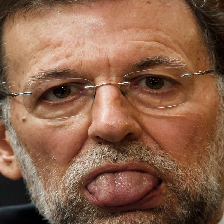

In [12]:
image

In [13]:
face_array = np.asarray(image)

In [14]:
face_array

array([[[ 45,  31,  22],
        [ 50,  36,  25],
        [ 47,  33,  22],
        ...,
        [ 38,  13,   6],
        [ 44,  20,  10],
        [ 37,  13,   3]],

       [[ 47,  33,  22],
        [ 54,  40,  31],
        [ 41,  27,  18],
        ...,
        [ 46,  19,   8],
        [ 40,  12,   8],
        [ 40,  13,   6]],

       [[ 52,  40,  28],
        [ 38,  25,  16],
        [ 40,  27,  18],
        ...,
        [ 46,  19,   8],
        [ 34,   7,   0],
        [ 42,  15,   6]],

       ...,

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 13,  13,  15],
        ...,
        [162, 152, 143],
        [166, 161, 155],
        [170, 165, 159]],

       [[ 14,  14,  14],
        [ 13,  13,  13],
        [ 14,  14,  16],
        ...,
        [161, 156, 137],
        [168, 164, 153],
        [167, 163, 152]],

       [[ 16,  14,  17],
        [ 14,  16,  15],
        [ 12,  14,  13],
        ...,
        [165, 159, 147],
        [170, 164, 152],
        [169, 165, 153]]

In [15]:
face_array = np.asarray(image)

In [16]:
""" Tying all of this together, the function extract_face() will load a
photograph from the loaded filename and return the extracted face.

It assumes that the photo contains one face and will return the 
first face detected.
"""

' Tying all of this together, the function extract_face() will load a\nphotograph from the loaded filename and return the extracted face.\n\nIt assumes that the photo contains one face and will return the \nfirst face detected.\n'

In [17]:
# extract a single face from a given photograph

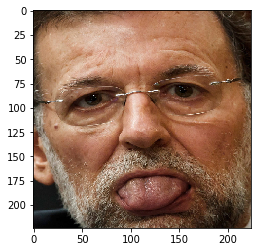

In [18]:


def extract_face(img, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(img)
    # create the detector, using default weights
    detector = MTCNN()
    #detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array


# load the photo and extract the face
pixels = extract_face('mariano_rajoy.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

In [19]:
#How to Perform Face Identification With VGGFace2
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions



In [20]:

from keras_vggface.vggface import VGGFace
#Am using the VGGFace2 models resnet50

In [ ]:
model = VGGFace(model='resnet50')

In [22]:
print('Inputs: %s' % model.inputs)

Inputs: [<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>]


In [23]:
print('Outputs: %s' % model.outputs)

Outputs: [<tf.Tensor 'classifier/Softmax:0' shape=(?, 8631) dtype=float32>]


In [24]:
pixels = pixels.astype('float32')

In [40]:
pixels

array([[[211., 214., 221.],
        [211., 214., 221.],
        [211., 214., 221.],
        ...,
        [128., 113.,  84.],
        [128., 113.,  84.],
        [128., 113.,  84.]],

       [[211., 214., 221.],
        [211., 214., 221.],
        [211., 214., 221.],
        ...,
        [128., 113.,  84.],
        [128., 113.,  84.],
        [128., 113.,  84.]],

       [[198., 201., 208.],
        [198., 201., 208.],
        [198., 201., 208.],
        ...,
        [121., 104.,  76.],
        [121., 104.,  76.],
        [121., 104.,  76.]],

       ...,

       [[211., 214., 219.],
        [211., 214., 219.],
        [211., 214., 219.],
        ...,
        [194., 194., 184.],
        [194., 194., 184.],
        [194., 194., 184.]],

       [[214., 219., 225.],
        [214., 219., 225.],
        [214., 219., 225.],
        ...,
        [200., 200., 190.],
        [200., 200., 190.],
        [200., 200., 190.]],

       [[214., 219., 225.],
        [214., 219., 225.],
        [214., 2

In [25]:
samples = expand_dims(pixels, axis=0)

In [26]:
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)

In [27]:
yhat = model.predict(samples)

In [28]:
yhat

array([[7.0659303e-06, 4.8190882e-06, 4.3449807e-05, ..., 9.0454905e-06,
        1.6420838e-05, 1.3353949e-04]], dtype=float32)

In [29]:
"""    This Keras model can be used directly to predict the probability 
of a given face belonging to one or more of more than eight thousand
knowncelebrities; for example:
"""

'    This Keras model can be used directly to predict the probability \nof a given face belonging to one or more of more than eight thousand\nknowncelebrities; for example:\n'

In [30]:
"""   Once a prediction is made, the class integers can be mapped to the names of the celebrities, and the top 
five names with the highest probability can be retrieved. """

'   Once a prediction is made, the class integers can be mapped to the names of the celebrities, and the top \nfive names with the highest probability can be retrieved. '

In [31]:
# convert prediction into names
results = decode_predictions(yhat)

In [32]:
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

b' Cristian_Preda': 7.333%
b' Osman_Nuri_Topba\xc5\x9f': 6.410%
b' Lubom\xc3\xadr_Zaor\xc3\xa1lek': 5.941%
b' Alberto_N\xc3\xba\xc3\xb1ez_Feij\xc3\xb3o': 3.709%
b' Yona_Metzger': 2.799%


In [33]:
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)

In [34]:
#The complete example is listed below.

# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph
def extract_face(img, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(img)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('cristina_cifuente.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))


b' Eleonore_Weisgerber': 20.375%
b' Stefanie_Stappenbeck': 5.227%
b' Gabriela_Michetti': 4.527%
b' Livinia_Nixon': 3.459%
b' Brenda_Strong': 2.477%


In [35]:
"""You might like to try this example with other photographs of celebrities taken from Wikipedia. Try a diverse set of genders, races, and ages. You will discover that the model is not perfect, but for those celebrities that it does know well, it can be effective.

You might like to try other versions of the model, such as ‘vgg16‘ and ‘senet50‘, then compare results. For example, I found that with a photograph of Oscar Isaac, that the ‘vgg16‘ is effective, but the VGGFace2 models are not.

The model could be used to identify new faces. One approach would be to re-train the model, perhaps just the classifier part of the model, with a new face dataset.

"""

'You might like to try this example with other photographs of celebrities taken from Wikipedia. Try a diverse set of genders, races, and ages. You will discover that the model is not perfect, but for those celebrities that it does know well, it can be effective.\n\nYou might like to try other versions of the model, such as ‘vgg16‘ and ‘senet50‘, then compare results. For example, I found that with a photograph of Oscar Isaac, that the ‘vgg16‘ is effective, but the VGGFace2 models are not.\n\nThe model could be used to identify new faces. One approach would be to re-train the model, perhaps just the classifier part of the model, with a new face dataset.\n\n'

In [ ]:
Steps on How save the trained model to tf serving model.



""" First, install the docker's container via this link  https://docs.docker.com/docker-for-windows/install/"""

Then run the below script to load the model into tf serving model.

i)  docker run -it -p 8500:8500 tensorflow/serving:latest-devel
        
"Train the CELEBRITY_FACE_DETECTION_USING_KERAS model inside a Dockers container by runing the below script"
        
2) python tensorflow_serving/example/CELEBRITY_FACE_DETECTION_USING_KERAS.py/tmp/CELEBRITY_FACE_DETECTION_USING_KERAS

"serve the model"

3) tensorflow_model_server --port=8500 --model_name=mnist --model_base_path=/tmp/CELEBRITY_FACE_DETECTION_USING_KERAS/

"test the client"
4) python tensorflow_serving/example/CELEBRITY_FACE_DETECTION_USING_KERAS.py --num_tests=1000 --server=localhost:8500